# Week 7 Contents -- Introduction to logistic regression
 - Introduction to Default dataset: relation between bank default and income and balance
 - logistic regression: output is categorical
 - logistic function
 - sk-learn library

In [1]:
import numpy as np
import pandas as pd

In [8]:
data = pd.read_csv('Default.csv')

In [9]:
data.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data.to_numpy()[0:10,:]

array([[1, 'No', 'No', 729.5264952, 44361.62507],
       [2, 'No', 'Yes', 817.1804066000001, 12106.1347],
       [3, 'No', 'No', 1073.549164, 31767.13895],
       [4, 'No', 'No', 529.2506047, 35704.49394],
       [5, 'No', 'No', 785.6558828999999, 38463.49588],
       [6, 'No', 'Yes', 919.5885304999999, 7491.558572],
       [7, 'No', 'No', 825.5133304999999, 24905.226580000002],
       [8, 'No', 'Yes', 808.6675042999999, 17600.45134],
       [9, 'No', 'No', 1161.057854, 37468.52929],
       [10, 'No', 'No', 0.0, 29275.268289999996]], dtype=object)

## logistic function
### Recall: In linear regression, the linear relation between sales (y) and tv (x) follows $y=ax+b$
### In logistic regression, the output (default) and the input (balance) has $y=\frac{1}{1+e^{ax+b}}$

In [12]:
def logistic(x,a,b):
    return 1/(1+np.exp(a*x+b))

In [13]:
tmpx = np.linspace(-10,10,500)

In [14]:
import matplotlib.pyplot as plt

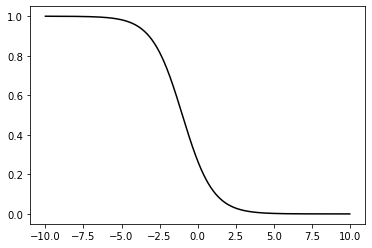

In [15]:
plt.plot(tmpx,logistic(tmpx,1,1),'k-')
plt.show()

## By convention, the nonlinear function $f(x)=\frac{1}{1+e^{-ax-b}}$ is the ${\it logistic}$ function. See ISLR page 131-132. Logistic function is one model which we can use to fit binary output with continuous input.

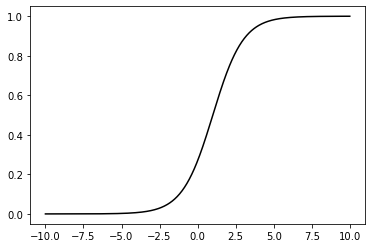

In [16]:
plt.plot(tmpx,logistic(tmpx,-1,1),'k-')
plt.show()

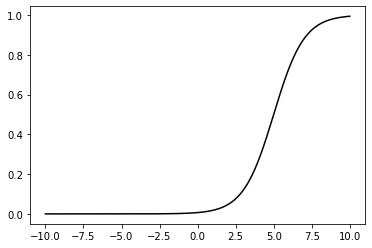

In [17]:
plt.plot(tmpx,logistic(tmpx,-1,5),'k-')
plt.show()

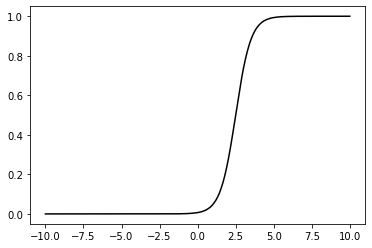

In [18]:
plt.plot(tmpx,logistic(tmpx,-2,5),'k-')
plt.show()

### We have seen the standard way to define a function and use it in plot. For students who want to enhance their python experience, please check previous Lab code and search for lambda function, which is a easier implementation for define function.

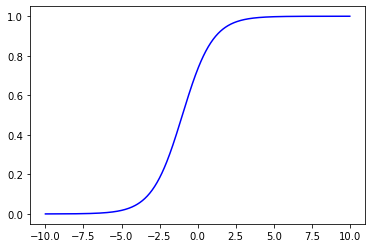

In [57]:
logis= lambda x, a, b: 1/(1+np.exp(-a*x-b))

plt.plot(tmpx,logis(tmpx,1,1),'b-')

## Now plot the data

In [19]:
data['default2'] = data.default.factorize()[0]

In [20]:
data.head()

,Unnamed: 0,default,student,balance,income,default2
0,1,No,No,729.526495,44361.62507,0
1,2,No,Yes,817.180407,12106.13470,0
2,3,No,No,1073.549164,31767.13895,0
3,4,No,No,529.250605,35704.49394,0
4,5,No,No,785.655883,38463.49588,0


In [21]:
X_balance = data.balance.values.reshape(-1,1)
y = data.default2.values.reshape(-1,1)

In [22]:
X_balance[0:10]

array([[ 729.5264952],
       [ 817.1804066],
       [1073.549164 ],
       [ 529.2506047],
       [ 785.6558829],
       [ 919.5885305],
       [ 825.5133305],
       [ 808.6675043],
       [1161.057854 ],
       [   0.       ]])

In [23]:
y[0:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

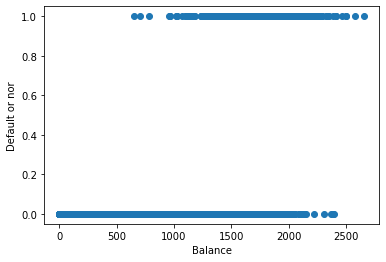

In [24]:
plt.scatter(X_balance, y)
plt.xlabel('Balance')
plt.ylabel('Default or nor')
plt.show()

## Use sci-kit-learn library to carry out the linear logistic regression to fit the data

In [25]:
import sklearn.linear_model as skl_lm

X_plot = np.arange(X_balance.min(), X_balance.max()).reshape(-1,1)

In [26]:
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_balance, y)
prob = clf.predict_proba(X_plot)

/Users/felix/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


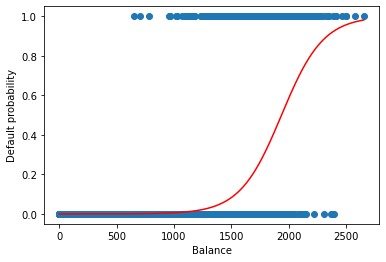

In [27]:
plt.scatter(X_balance, y)
plt.plot(X_plot,prob[:,1],'r-')
plt.xlabel('Balance')
plt.ylabel('Default probability')
plt.show()

In [28]:
print(clf.classes_)

[0 1]


In [29]:
print(clf.coef_)

[[0.00549892]]


In [30]:
print(clf.intercept_)

[-10.65133019]


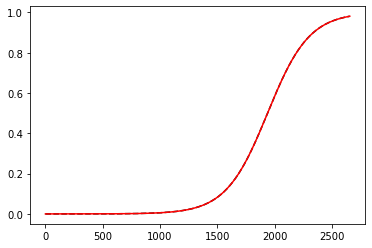

In [31]:
plt.plot(X_plot,logistic(X_plot,(-1.)*clf.coef_,(-1.)*clf.intercept_),'k--')
plt.plot(X_plot,prob[:,1],'r-')

In [32]:
data[data.default2==0].to_numpy().shape[0]

9667

In [33]:
y_pred = clf.predict(X_balance)

### Now we can judge the classifier by checking if the prediction matches with the truth
We set up 4 variables to indicate the following cases:
1. The truth is not default and the prediction matches (true negative)
2. The truth is default and the prediction matches (true positive)
3. The truth is default but the classifier says otherwise (false negative)
4. The true is not default but the classifier says otherwise (false positive)

In [37]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0


for i in range(y_pred.shape[0]):
    if y[i] == 0 and y_pred[i] == 0:
        true_negative += 1
    elif y[i] == 1 and y_pred[i] == 1:
        true_positive += 1
    elif y[i] == 0 and y_pred[i] == 1:
        false_positive += 1
    else:
        false_negative += 1
        
print('Number of true negatives is', true_negative)
print('Number of true positives is', true_positive)
print('Number of false negatives', false_negative)
print('Number of false positives', false_positive)

Number of true negatives is 9625
Number of true positives is 100
Number of false negatives 233
Number of false positives 42


### Now we define the following import measures:
1. precision = $\frac{TP}{TP+FP}$
2. recall = $\frac{TP}{TP+FN}$
3. f-1 score, $F_1 = 2\frac{precision*recall}{precision+recall}$

TP stands for number of true positives; FP for false positive; FN for false negative; TN for true negative.

## Note. Same definition also applies to negative case. So there is also a precision for negative case. See below the classification report.

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [39]:
confusion_matrix(y, y_pred).T

array([[9625,  233],
       [  42,  100]])

In [40]:
print(classification_report(y, y_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99      9667
    Positive       0.70      0.30      0.42       333

    accuracy                           0.97     10000
   macro avg       0.84      0.65      0.70     10000
weighted avg       0.97      0.97      0.97     10000



# Please verify the precision, recall, and f1-score shown above by manually doing the math. Note that you have 6 numbers to verify. For example, the recall for positive = tp/(tp+fn) and I do the following math,

In [41]:
100/(100+233)

0.3003003003003003

## Next, we split the data set into training and test subsets. See the performance by confusion matrix.

In [42]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_balance, y, test_size=0.5, random_state=1)

In [60]:
y_train.shape

(5000, 1)

In [61]:
y_test.shape

(5000, 1)

In [62]:
np.count_nonzero(y_train == 1)

174

In [63]:
np.count_nonzero(y_train == 0)

4826

In [64]:
np.count_nonzero(y_test == 1)

159

In [65]:
np.count_nonzero(y_train == 0)

4826

In [66]:
model = skl_lm.LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)

/Users/felix/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(solver='newton-cg')

In [67]:
pred_train = model.predict(X_train)

In [68]:
confusion_matrix(y_train, pred_train).T

array([[4799,  119],
       [  27,   55]])

In [69]:
pred_test = model.predict(X_test)

In [70]:
confusion_matrix(y_test, pred_test).T

array([[4813,  106],
       [  28,   53]])